In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from importlib import reload
from time import time
import pickle
from copy import deepcopy
import re

import numpy as np
import scipy as sc
import pandas as pd
import torch
print(torch.cuda.is_available())

import models
import rna

import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams["font.size"] = 12

import seaborn as sns
sns.set_style('whitegrid')

True


In [34]:
reload(rna)

# ----- build menu of design algorithm names -----
adalead_thresholds = [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01]
biswas_temperatures = [0.02, 0.015, 0.01, 0.005]
cbas_dbas_quantiles = np.arange(0.1, 0.91, 0.1)
dbas_ridge_quantiles = [0.1, 0.2]

design_names = ['vae-ridge']
# cbas ridge
for q in cbas_dbas_quantiles:
    q = round(q, 2)
    design_names.append(f'cbas-ridge-{q}t19')

# dbas ridge
for q in dbas_ridge_quantiles:
    q = round(q, 2)
    design_names.append(f'dbas-ridge-{q}t19')
    
for model_name in ['ridge', 'ff', 'cnn']:
    
    # adalead
    for thresh in adalead_thresholds:
        thresh = round(thresh, 4)
        design_names.append(f'adalead-{model_name}-{thresh}')
    
    # biswas
    for temp in biswas_temperatures:
        temp = round(temp, 4)
        design_names.append(f'biswas-{model_name}-{temp}') 
    
    # PEX
    design_names.append(f'pex-{model_name}') 
        
    if model_name != 'ridge':
        # cbas
        for q in cbas_dbas_quantiles:
            q = round(q, 2)
            design_names.append(f'cbas-{model_name}-{q}')
        
        # dbas
        for q in cbas_dbas_quantiles:
            q = round(q, 2)
            design_names.append(f'dbas-{model_name}-{q}')
    

design_pkl_fname = '/data/wongfanc/rna-results/designs-041124.pkl'
model_and_data_fname_no_ftype = 'nsd0.02-040324'
tau = 0.3

ei_LN, ydesign_LN, ei_L, meany_L = rna.run_bo_selection_experiments(
    tau,
    design_names,
    design_pkl_fname,
    model_and_data_fname_no_ftype,
)

No design data for dbas-ridge-0.3t0, exiting MDRE select_intermediate_iterations.
No design data for dbas-ridge-0.4t0, exiting MDRE select_intermediate_iterations.
No design data for dbas-ridge-0.5t0, exiting MDRE select_intermediate_iterations.
No design data for dbas-ridge-0.6t0, exiting MDRE select_intermediate_iterations.
No design data for dbas-ridge-0.7t0, exiting MDRE select_intermediate_iterations.
No design data for dbas-ridge-0.8t0, exiting MDRE select_intermediate_iterations.
No design data for dbas-ridge-0.9t0, exiting MDRE select_intermediate_iterations.
All design names in provided design data:
cbas-ridge-0.1t19
cbas-ridge-0.2t19
cbas-ridge-0.3t19
cbas-ridge-0.4t19
cbas-ridge-0.5t19
cbas-ridge-0.6t19
cbas-ridge-0.7t19
cbas-ridge-0.8t19
cbas-ridge-0.9t19
dbas-ridge-0.1t19
dbas-ridge-0.2t19
adalead-ridge-0.5
adalead-ridge-0.4
adalead-ridge-0.3
adalead-ridge-0.2
adalead-ridge-0.1
adalead-ridge-0.05
adalead-ridge-0.01
pex-ridge
adalead-ff-0.5
adalead-ff-0.4
adalead-ff-0.3
ada

In [35]:
# womp womp
idx = np.argsort(ei_LN)[::-1]
for N in [100, 1000, 10000, 100000]:
    print(np.mean(ydesign_LN[idx[: N]]))

0.5092801452192184
0.4924528912303099
0.4689816655725114
0.4365681809781865


In [37]:
i_max = np.argmax(ei_L)
print(meany_L[i_max])

0.42606509972616835


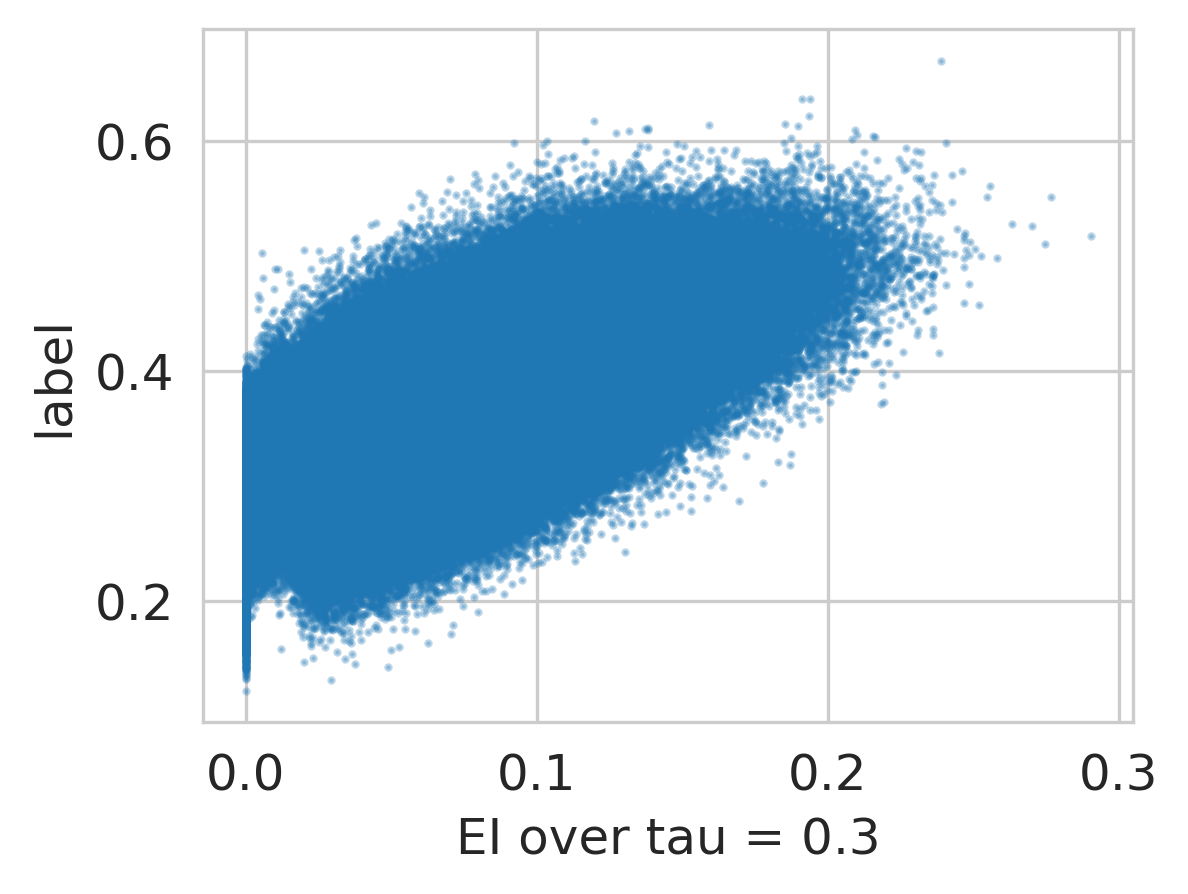

In [36]:
sns.set_style('whitegrid')
plt.figure(figsize=(4, 3), dpi=300)
plt.scatter(ei_LN, ydesign_LN, alpha=0.3, s=1);
plt.xlabel('EI over tau = {}'.format(tau));
plt.ylabel('label');